# Attribution
From [Getting Started with Deep Learning using Keras and Python](https://www.safaribooksonline.com/oriole/getting-started-with-deep-learning-using-keras-and-python).

Ran successfully on [Jupyter Tensorflow Notebook](https://github.com/jupyter/docker-stacks/tree/master/tensorflow-notebook).

# Using scikit-learn

In [1]:
%matplotlib inline
import seaborn as sns
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegressionCV

from keras.models import Sequential
from keras.layers.core import Dense, Activation
from keras.utils import np_utils

Using TensorFlow backend.


In [2]:
!wget -q -N https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/iris.csv

In [3]:
iris = pd.read_csv('iris.csv', usecols=range(1,6))
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


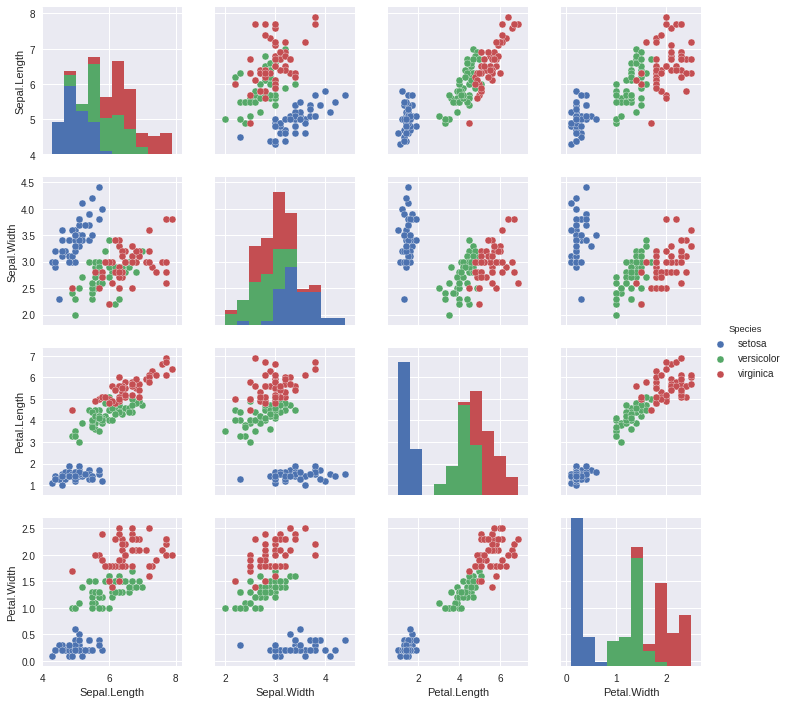

In [4]:
sns.pairplot(iris, hue='Species');

In [5]:
X = iris.values[:, :4]
y = iris.values[:, 4]

In [6]:
train_X, test_X, train_y, test_y = train_test_split(X, y, train_size=0.5, random_state=0)

In [7]:
lr = LogisticRegressionCV()
lr.fit(train_X, train_y)

LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
           fit_intercept=True, intercept_scaling=1.0, max_iter=100,
           multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
           refit=True, scoring=None, solver='lbfgs', tol=0.0001, verbose=0)

In [8]:
print("Accuracy = {:.2f}".format(lr.score(test_X, test_y)))

Accuracy = 0.83


# Using Keras

In [9]:
def one_hot_encode_object_array(arr):
    '''One hot encode a numpy array of objects (e.g. strings)'''
    uniques, ids = np.unique(arr, return_inverse=True)
    return np_utils.to_categorical(ids, len(uniques))

train_y_ohe = one_hot_encode_object_array(train_y)
test_y_ohe = one_hot_encode_object_array(test_y)

In [10]:
model = Sequential()

In [11]:
model.add(Dense(16, input_shape=(4,)))
model.add(Activation('sigmoid'))

In [12]:
model.add(Dense(3))
model.add(Activation('softmax'))

In [13]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=["accuracy"])

In [14]:
model.fit(train_X, train_y_ohe, epochs=100, batch_size=1, verbose=0);

In [15]:
loss, accuracy = model.evaluate(test_X, test_y_ohe, verbose=0)
print("Accuracy = {:.2f}".format(accuracy))

Accuracy = 0.97
